In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from typing import Tuple
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import latexify
from scipy.signal import convolve2d

# Single time step Plot

In [9]:
from mpl_paint_utils import read_npy_ds,dincae_plt,get_iters,cal_cloud_mask,creat_land_mask

In [ ]:
folder_date = 20230228
folder_time = 943
basic_path = "/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/img/"
epoch_iters = get_iters("/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/img/20230228-0943")
epoch_target = [0,5,10,30,82,110,115]
epoch_target = [115]
title = "DinCAE"
for e,i in epoch_iters:
    if int(e) in epoch_target:
        try:
            train,label,pred,land_mask = read_npy_ds(folder_date,folder_time,int(e),int(i),basic_path)
            dincae_plt(train,label,pred,land_mask,e,title)
        except FileNotFoundError as error:
            print("e: ",e)
            print("i: ",i)
    else:   
        pass

In [ ]:
folder_date = 20230106
folder_time = 141
basic_path = "/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/img/"
title = "Fourier Conv-LSTM"
epoch = 200
iters = 61
train,label,pred,land_mask = read_npy_ds(folder_date,folder_time,int(epoch),int(iters),basic_path)

for i in range(10):
    train_plot_arr = train[:,i,0,:,:]
    label_plot_arr = label[:,i,0,:,:]
    pred_plot_arr = pred[:,i,0,:,:]
    dincae_plt(train_plot_arr,label_plot_arr,pred_plot_arr,land_mask,epoch,title)


In [ ]:
# 时序图像一张图
plt.rcParams["font.family"] = "times New Roman"
fig, ax = plt.subplots(3, 10, dpi=600, figsize=(10,3))
for i in range(10):
    min = np.nanmax([np.nanmin(train[0,i,0]), np.nanmin(label[0,i,0]), np.nanmin(pred[0,i,0])])\
         + 0.5
    max = np.nanmin([np.nanmax(train[0,i,0]), np.nanmax(label[0,i,0]), np.nanmax(pred[0,i,0])])\
         - 0.5
    step_scale = (max - min)/100 
    cm = plt.get_cmap('rainbow')
    ticks = np.array([min, min+15*step_scale,0,min+30*step_scale,min+60*step_scale,min+85*step_scale,max], dtype=float)
    ticklabels = np.around(np.power(10, ticks), 2)
    
    ticks[0] = np.log10(0.05)
    ticks[-1] = np.log10(8)
    
    ticklabels[0] = 0.05
    ticklabels[-1] = 8
    
    min = np.log10(0.05)
    max = np.log10(8)
    
    im = ax[0,i].imshow(train[0,i,0],
                      vmin=min, vmax=max, 
                      cmap=cm)
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    ax[0,i].text(10,45,f"cloud: {cal_cloud_mask(train[0,i,0],land_mask)}%", size=3.5)
    
    iL = ax[1,i].imshow(label[0,i,0],
                      vmin=min, vmax=max, 
                      cmap=cm)
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    ax[1,i].text(10,45,f"cloud: {cal_cloud_mask(label[0,i,0],land_mask)}%", size=3.5)
    
    ip = ax[2,i].imshow(pred[0,i,0],
                           vmin=min, vmax=max, 
                           cmap=cm)
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    ax[2,i].text(10,45,f"cloud: {cal_cloud_mask(pred[0,i,0],land_mask)}%", size=3.5)

for w in range(10):
     for h in range(3):
          for axis in ["left","right","top","bottom"]:
               ax[h,w].spines[axis].set_linewidth(0.45)

ax[0,0].set_ylabel("Input", fontsize=6)
ax[1,0].set_ylabel("G T", fontsize=6)
ax[2,0].set_ylabel("Pred", fontsize=6)

p0 = ax[2,0].get_position().get_points().flatten()
p2 = ax[2,9].get_position().get_points().flatten()

ax_cbar1 = fig.add_axes([p0[0],p0[1]-0.05, p2[2]-p0[0], 0.01])
colorbar = plt.colorbar(im, cax=ax_cbar1, orientation='horizontal', 
                        ticks=ticks
                        )
colorbar.ax.set_xticklabels(ticklabels)
plt.suptitle(f'Fourier Conv-LSTM performence-{epoch}', y=1.01,fontsize=16)
# plt.suptitle(f'Conv-LSTM performence-{epoch}', y=1.01,fontsize=16)
plt.show()

In [ ]:
# 一张图自对比图
def reshape(image:np.ndarray):
    return image.reshape(-1)
fig, ax = plt.subplots(2, 5, dpi=600, figsize=(11,4))
for i in range(10):
    ax_w = i // 5
    ax_h = i % 5
    label_reshape = reshape(label[0,i,0])
    pred_reshape = reshape(pred[0,i,0])
    diff = np.absolute(label_reshape - pred_reshape)
    im = ax[ax_w, ax_h].scatter(label_reshape,pred_reshape,s=2.,c=diff,cmap='rainbow',vmin=0.0,vmax=1.5)

plt.suptitle(f'Flouier Conv-LSTM performence-{epoch}', y=1.001,fontsize=16)
plt.show();

In [ ]:
label_vstack = label.reshape(-1)
pred_vstack = pred.reshape(-1)
diff_vstack = np.absolute(label_vstack-pred_vstack)
plt.figure(dpi=600,figsize=(5,5))
plt.scatter(label_vstack,pred_vstack,s=2.,c=diff_vstack,cmap='rainbow',vmin=0.0,vmax=1.5)
plt.title(f'Flouier Conv-LSTM performence-{epoch}', y=1.001,fontsize=16)
plt.show();

In [ ]:
# log scale
for i in range(10):
    min = np.nanmax([np.nanmin(train[0,i,0]), np.nanmin(label[0,i,0]), np.nanmin(pred[0,i,0])])\
         + 0.5
    max = np.nanmin([np.nanmax(train[0,i,0]), np.nanmax(label[0,i,0]), np.nanmax(pred[0,i,0])])\
         - 0.5
    step_scale = (max - min)/100 
    cm = plt.get_cmap('rainbow')
    ticks = np.array([min, min+15*step_scale,0,min+30*step_scale,min+60*step_scale,min+85*step_scale,max], dtype=float)
    ticklabels = np.around(np.power(10, ticks), 2)
    
    fig, ax = plt.subplots(1, 3, dpi=300)
    im = ax.flat[0].imshow(train[0,i,0],
                      vmin=min, vmax=max, 
                      cmap=cm)
    ax.flat[0].set_xticks([])
    ax.flat[0].set_yticks([])
    ax.flat[0].set_title("Input")
    ax.flat[0].text(10,30,f"cloud_ratio: {cal_cloud_mask(train[0,i,0],land_mask)}%", size=6)
    
    iL = ax.flat[1].imshow(label[0,i,0],
                      vmin=min, vmax=max, 
                      cmap=cm)
    ax.flat[1].set_xticks([])
    ax.flat[1].set_yticks([])
    ax.flat[1].set_title("Ground Turth")
    ax.flat[1].text(10,30,f"cloud_ratio: {cal_cloud_mask(label[0,i,0],land_mask)}%", size=6)
    
    ip = ax.flat[2].imshow(pred[0,i,0],
                           vmin=min, vmax=max, 
                           cmap=cm)
    ax.flat[2].set_xticks([])
    ax.flat[2].set_yticks([])
    ax.flat[2].set_title("Prediction")
    ax.flat[2].text(10,30,f"cloud_ratio: {cal_cloud_mask(pred[0,i,0],land_mask)}%", size=6)
    plt.draw()
    p0 = ax[0].get_position().get_points().flatten()
    p1 = ax[1].get_position().get_points().flatten()
    p2 = ax[2].get_position().get_points().flatten()
    
    ax_cbar1 = fig.add_axes([p0[0],p0[1]-0.05, p2[2]-p0[0], 0.01])
    colorbar = plt.colorbar(im, cax=ax_cbar1, orientation='horizontal', 
                            ticks=ticks
                            )
    colorbar.ax.set_xticklabels(ticklabels)
    plt.show()

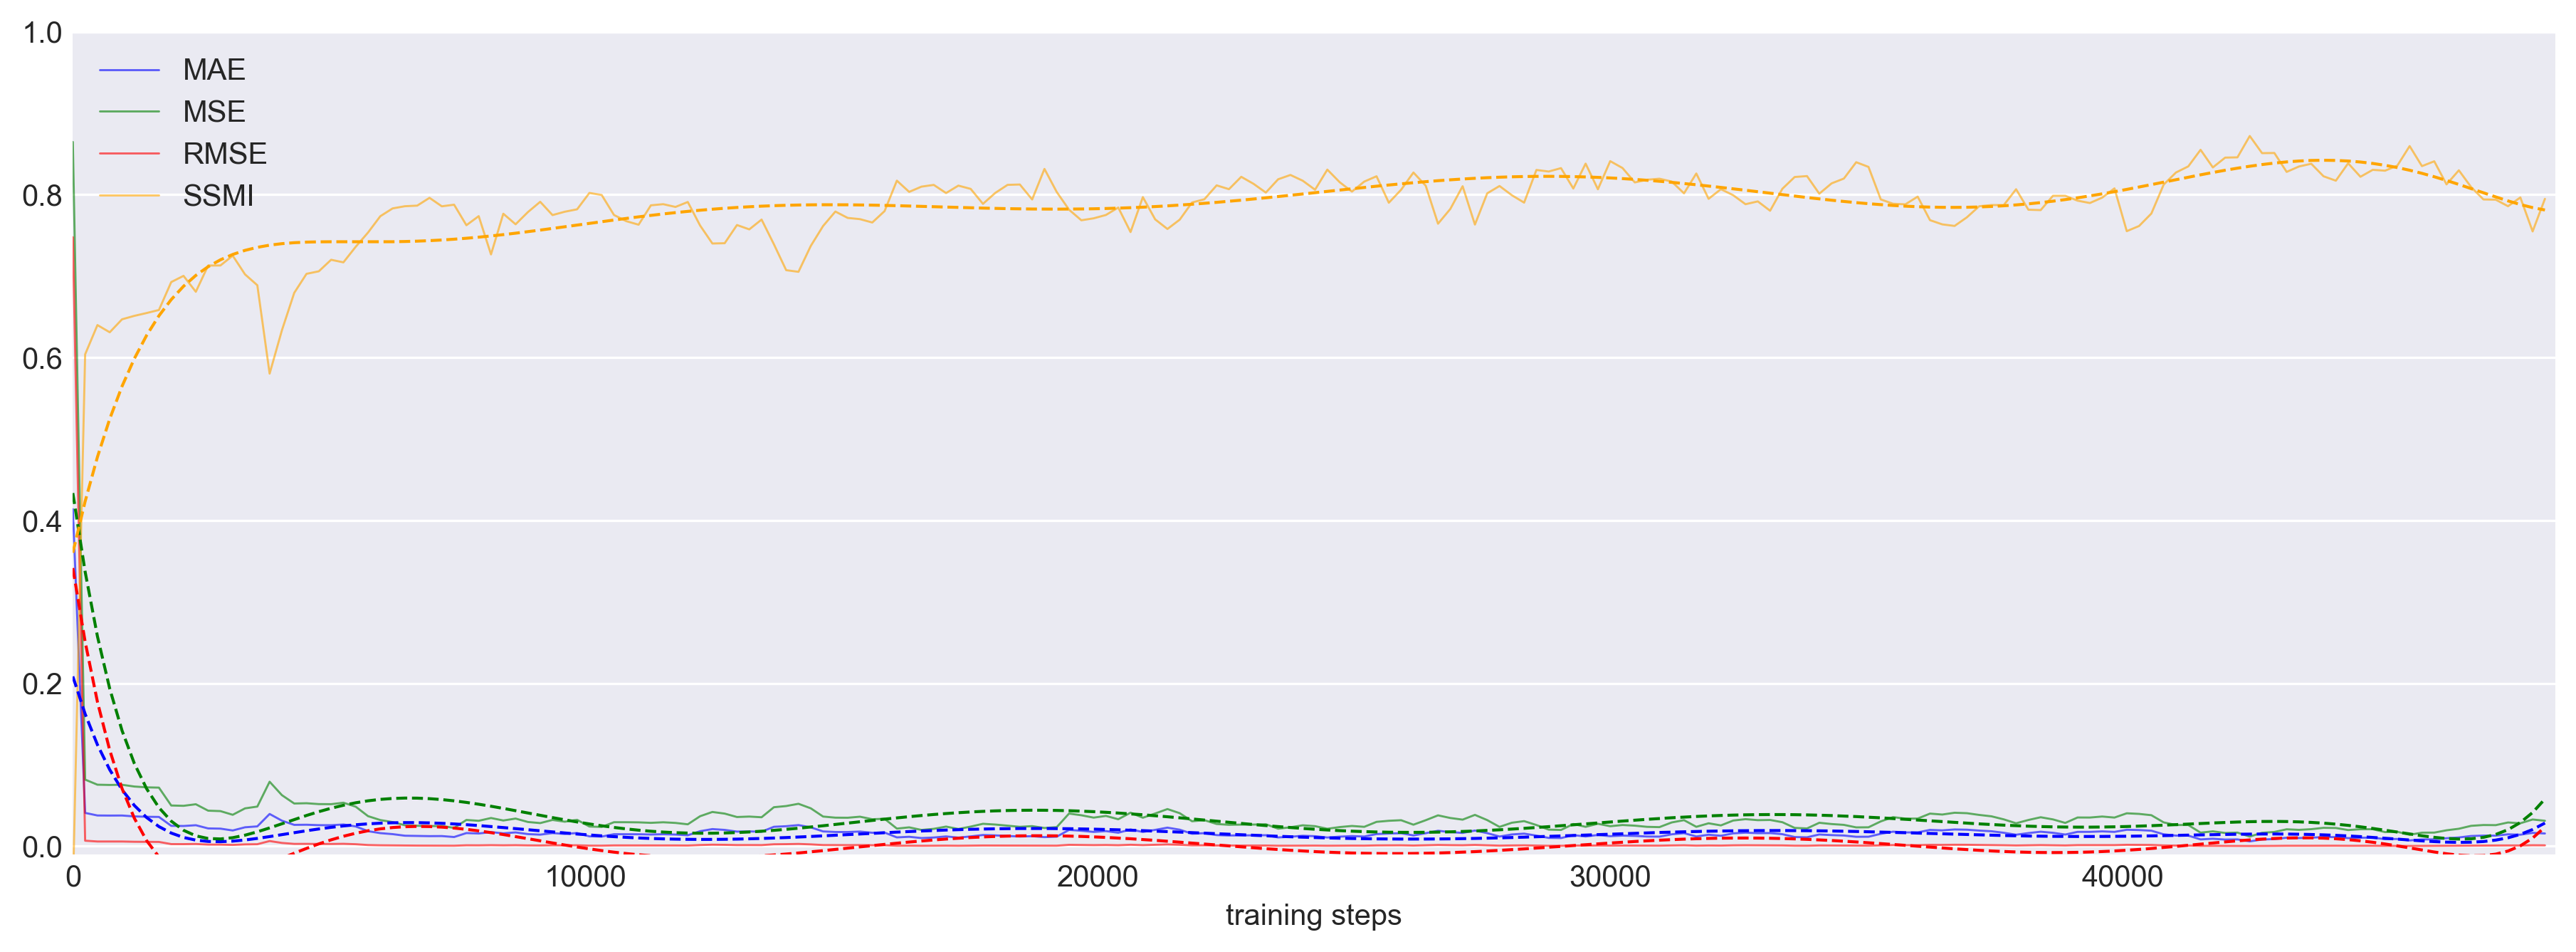

In [20]:
mae_dir = "/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/stats/20230106-0141/mae_losses.txt"
mse_dir = "/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/stats/20230106-0141/mse_losses.txt"
ssmi_dir = "/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/stats/20230106-0141/ssmi_losses.txt"

def polyfit_array(x,y, times):
    z = np.polyfit(x,y,times)
    zpoly = np.poly1d(z)
    return zpoly(x)

f = open(mae_dir, "r")
mae = [float(i.replace("\n", "0")) for i in f.readlines()]
f = open(mse_dir, "r")
mse = [float(i.replace("\n", "0")) for i in f.readlines()]
f = open(ssmi_dir, "r")
ssmi = [float(i.replace("\n", "0")) for i in f.readlines()]

x = np.arange(0, len(ssmi),240)

mae_y = []
mse_y = []
ssmi_y = []

for i in x:
    mae_y.append(mae[i])
    mse_y.append(mse[i])
    ssmi_y.append(ssmi[i])

mae_y = np.array(mae_y)
mse_y = np.array(mse_y)
ssmi_y = np.array(ssmi_y)
rmse_y = np.square(mse_y)

plt.figure(
    figsize=(15,5),
           dpi=300)

plt.rcParams['font.sans-serif'] = ['SimSun']
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams['image.interpolation'] = 'nearest'

plt.plot(x, mae_y,  label="MAE",  linewidth=0.7, alpha=0.6, color="blue")
plt.plot(x, mse_y,  label="MSE",  linewidth=0.7, alpha=0.6, color="green")
plt.plot(x, rmse_y, label="RMSE", linewidth=0.7, alpha=0.6, color="red")
plt.plot(x, ssmi_y, label="SSMI", linewidth=0.7, alpha=0.6, color="orange")

plt.plot(x, polyfit_array(x, mae_y,  10), linewidth=1, linestyle="--", color="blue")
plt.plot(x, polyfit_array(x, mse_y,  10), linewidth=1, linestyle="--", color="green")
plt.plot(x, polyfit_array(x, rmse_y, 10), linewidth=1, linestyle="--", color="red")
plt.plot(x, polyfit_array(x, ssmi_y, 9), linewidth=1, linestyle="--", color="orange")

plt.grid(axis="x")

plt.xlabel("training steps")

plt.ylim((-0.01,1))
plt.xlim((0,len(ssmi)))

plt.legend(loc="best")

plt.show()

In [10]:
test = np.load("/home/chensiyu/workspace/02_scientist_program/02_img_recovery/tensor([0]).npy")

In [ ]:
for i in range(10):
    test_1 = test[0,i,0]
    land_mask = creat_land_mask()
    test_1[land_mask] = np.NaN
    cm = plt.get_cmap('rainbow')
    lon = np.linspace(105,125,5,dtype=np.uint8)
    lat = np.linspace(5,25,5,dtype=np.uint8)
    vmin=np.nanmin(test_1)
    vmax=np.nanmax(test_1)
    plt.imshow(test_1,vmin=vmin, vmax=vmax, cmap=cm)
    plt.show()